# Supervised Learning: Linear Regression

In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regession methods, check out the [wikipedia page](http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's wonderful lectures for free on [youtube](https://www.youtube.com/watch?v=5u4G23_OohI).

In this section we will be working through linear regression with the following steps:

    Step 1: Getting and setting up the data.
    Step 2: Visualizing current data.
    Step 3: The mathematics behind the Least Squares Method.
    Step 4: Using Numpy for a Univariate Linear Regression.
    Step 5: Getting the error.
    Step 6: Using scikit learn to implement a multivariate regression.
    Step 7: Using Training and Validation.  
    Step 8: Predicting Prices
    Step 9 : Residual Plots
    

### Step 1: Getting and setting up the data.

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.

In [7]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

Imports for plotting

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Now import dataset from scikit learn as well as the linear_model module. Note: You may have to run a download, scikit learn will read an error and prompt you to if you don't have the datasets.

In [9]:
from sklearn.datasets import load_boston

Next we'll download the data set

In [10]:
# Load the housing dataset
boston = load_boston()

Let's see what the data set contains

In [11]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Step 2: Visualizing current data

You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.

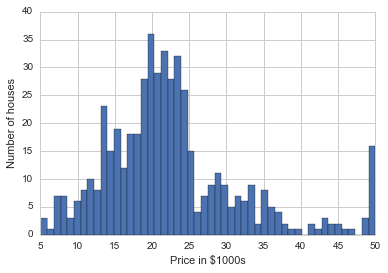

In [12]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Interesting, now let's see a scatter plot of one feature, versus the target. In this case we'll use the housing price versus the number of rooms in the dwelling.

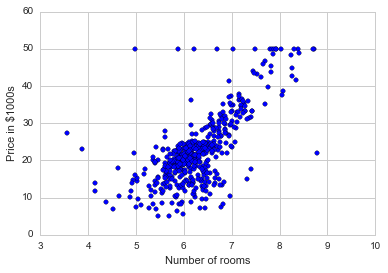

In [13]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

Let's try to do the following:

    1.) Use pandas to transform the boston dataset into a DataFrame: 
    
    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [14]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Now let's add the target of the boston data set, the price. We'll create a new column in our DataFrame.

In [15]:
# Set price column for target
boston_df['Price'] = boston.target

Now let's see the resultign DataFrame!

In [16]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Now, you might be reminded of the seaborn lmplot function we used during the visualization lectures. You could use it here to do a linear fit automatically!

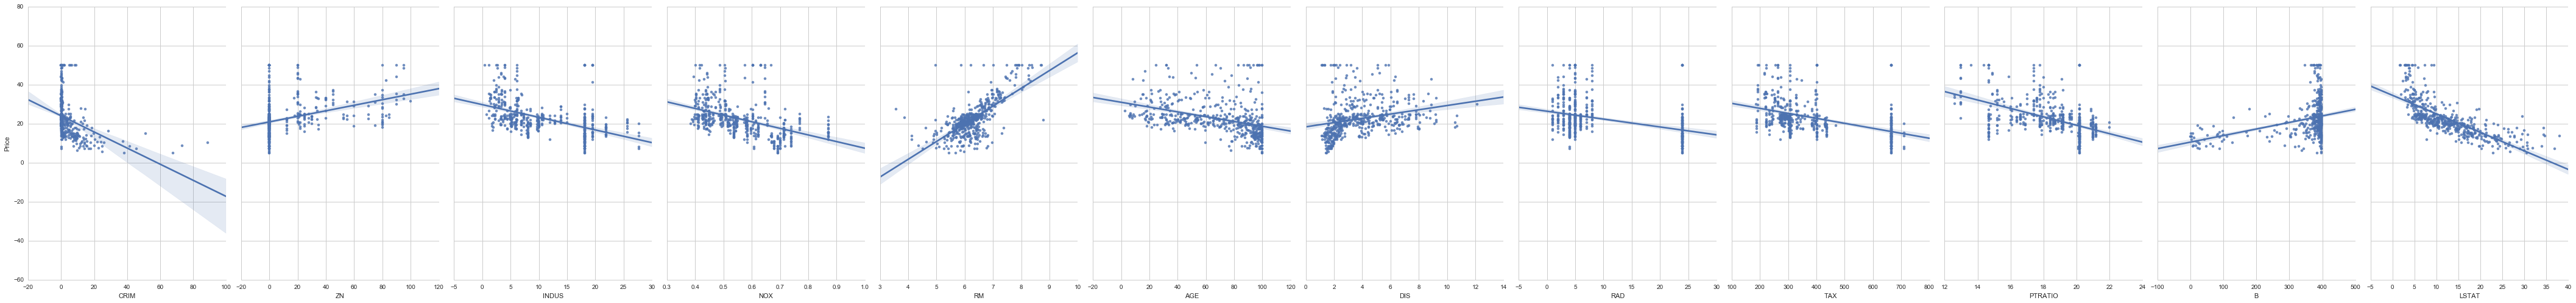

In [17]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(boston_df, x_vars=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='Price', size=7, aspect=0.7, kind='reg')

In the previous plot we have plotted each feature against the response variable (price). In this exploratory example we can observe that the 5th plot (RM - Room Number) has the higher correlation comparing to the rest of features.The price increases with a high slope accoring to the Room Numbers.

For other features the slope does not increase so quickly upwards as it happens with the Room Number. 
On the other hand, the price dicreases (has a negative linear relationship) as the CRIM RATE feature increases.


Let's implement the LINEAR FIT AUTOMATICALLY WITH SEABORN for the RM (ROOM NUMBER FEATURE): 


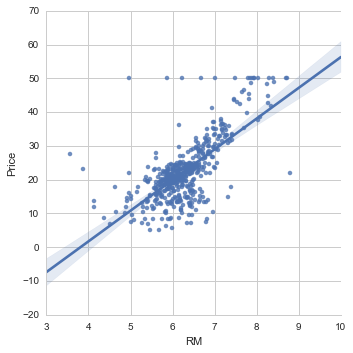

In [18]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

However, we won't be able to do this when we move to more complicated regression models, so we'll stay focused on using the scikit learn library!

### Step 3: The mathematics behind the Least Squares Method.

In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

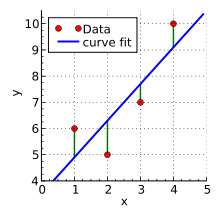

In [19]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)


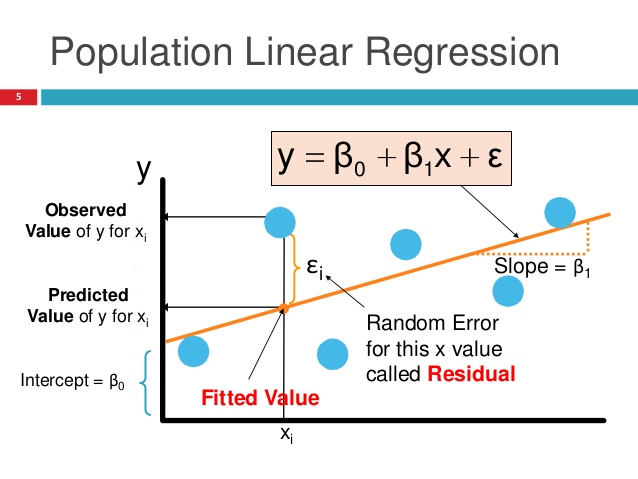

In [20]:
from IPython.display import Image
url = 'http://image.slidesharecdn.com/correlationlinearregression-minitaboutput-140112092019-phpapp02/95/correlation-linear-regression-minitab-output-5-638.jpg'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this great [video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the power of scikit learn to do a full multivariate linear regression.

### Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [21]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
$$y=mx+b$$
which we can rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$

This is the same as the first equation if you carry out the linear algebra. 
So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [22]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

Great! Now we can get the best fit values!

In [23]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

Finally let's plot it all together! Note that we use the original format of the boston information. We only did our matrix transformations to utilize the numpy least square method.

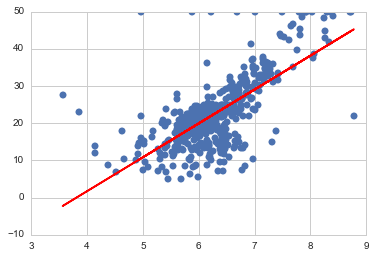

In [24]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

### Step 5: Getting the error 

Great! We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. Checking out the documentation [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier. 

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [25]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print "The root mean squared error was %.2f " %rmse

The root mean squared error was 6.60 


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

### Step 6.0: Use package "STATSMODELS" to implement a multivariate regression (alternative to scikit learn)

In [26]:
# Obtain Data Columns , remove Price (target) to enter into the model 
X_multi = boston_df.drop('Price',1)

# Targets, we want to predict the price given some data (other variables from the dataset used to train model)
Y_target = boston_df.Price

#Now with other lib - statsmodel
import statsmodels.formula.api as sm

#Let's add another variable, required by statsmodels package in case that we want to add an intercept to the model
X_with_indep = None
X_with_indep = X_multi
X_with_indep['intercept_'] = np.ones((len(X_multi), 1))

#implement the model using the method "Ordinary Least Squares" model 
sm_fit = sm.OLS(Y_target,X_with_indep).fit()
sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Jan 2016   Prob (F-statistic):          6.95e-135
Time:                        10:17:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
intercept_    36.4911      5.104      7.149      0.000        26.462    46.520
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this example we see how to obtain easily the coeficients of the linear model (CRIM -0.1072, ZN 0.0464, ...)

Furthermore this package provides some parameters as the AIC, BIC or R-SQUARED that are useful to evaluate quality the linear model

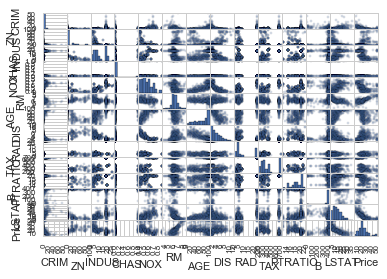

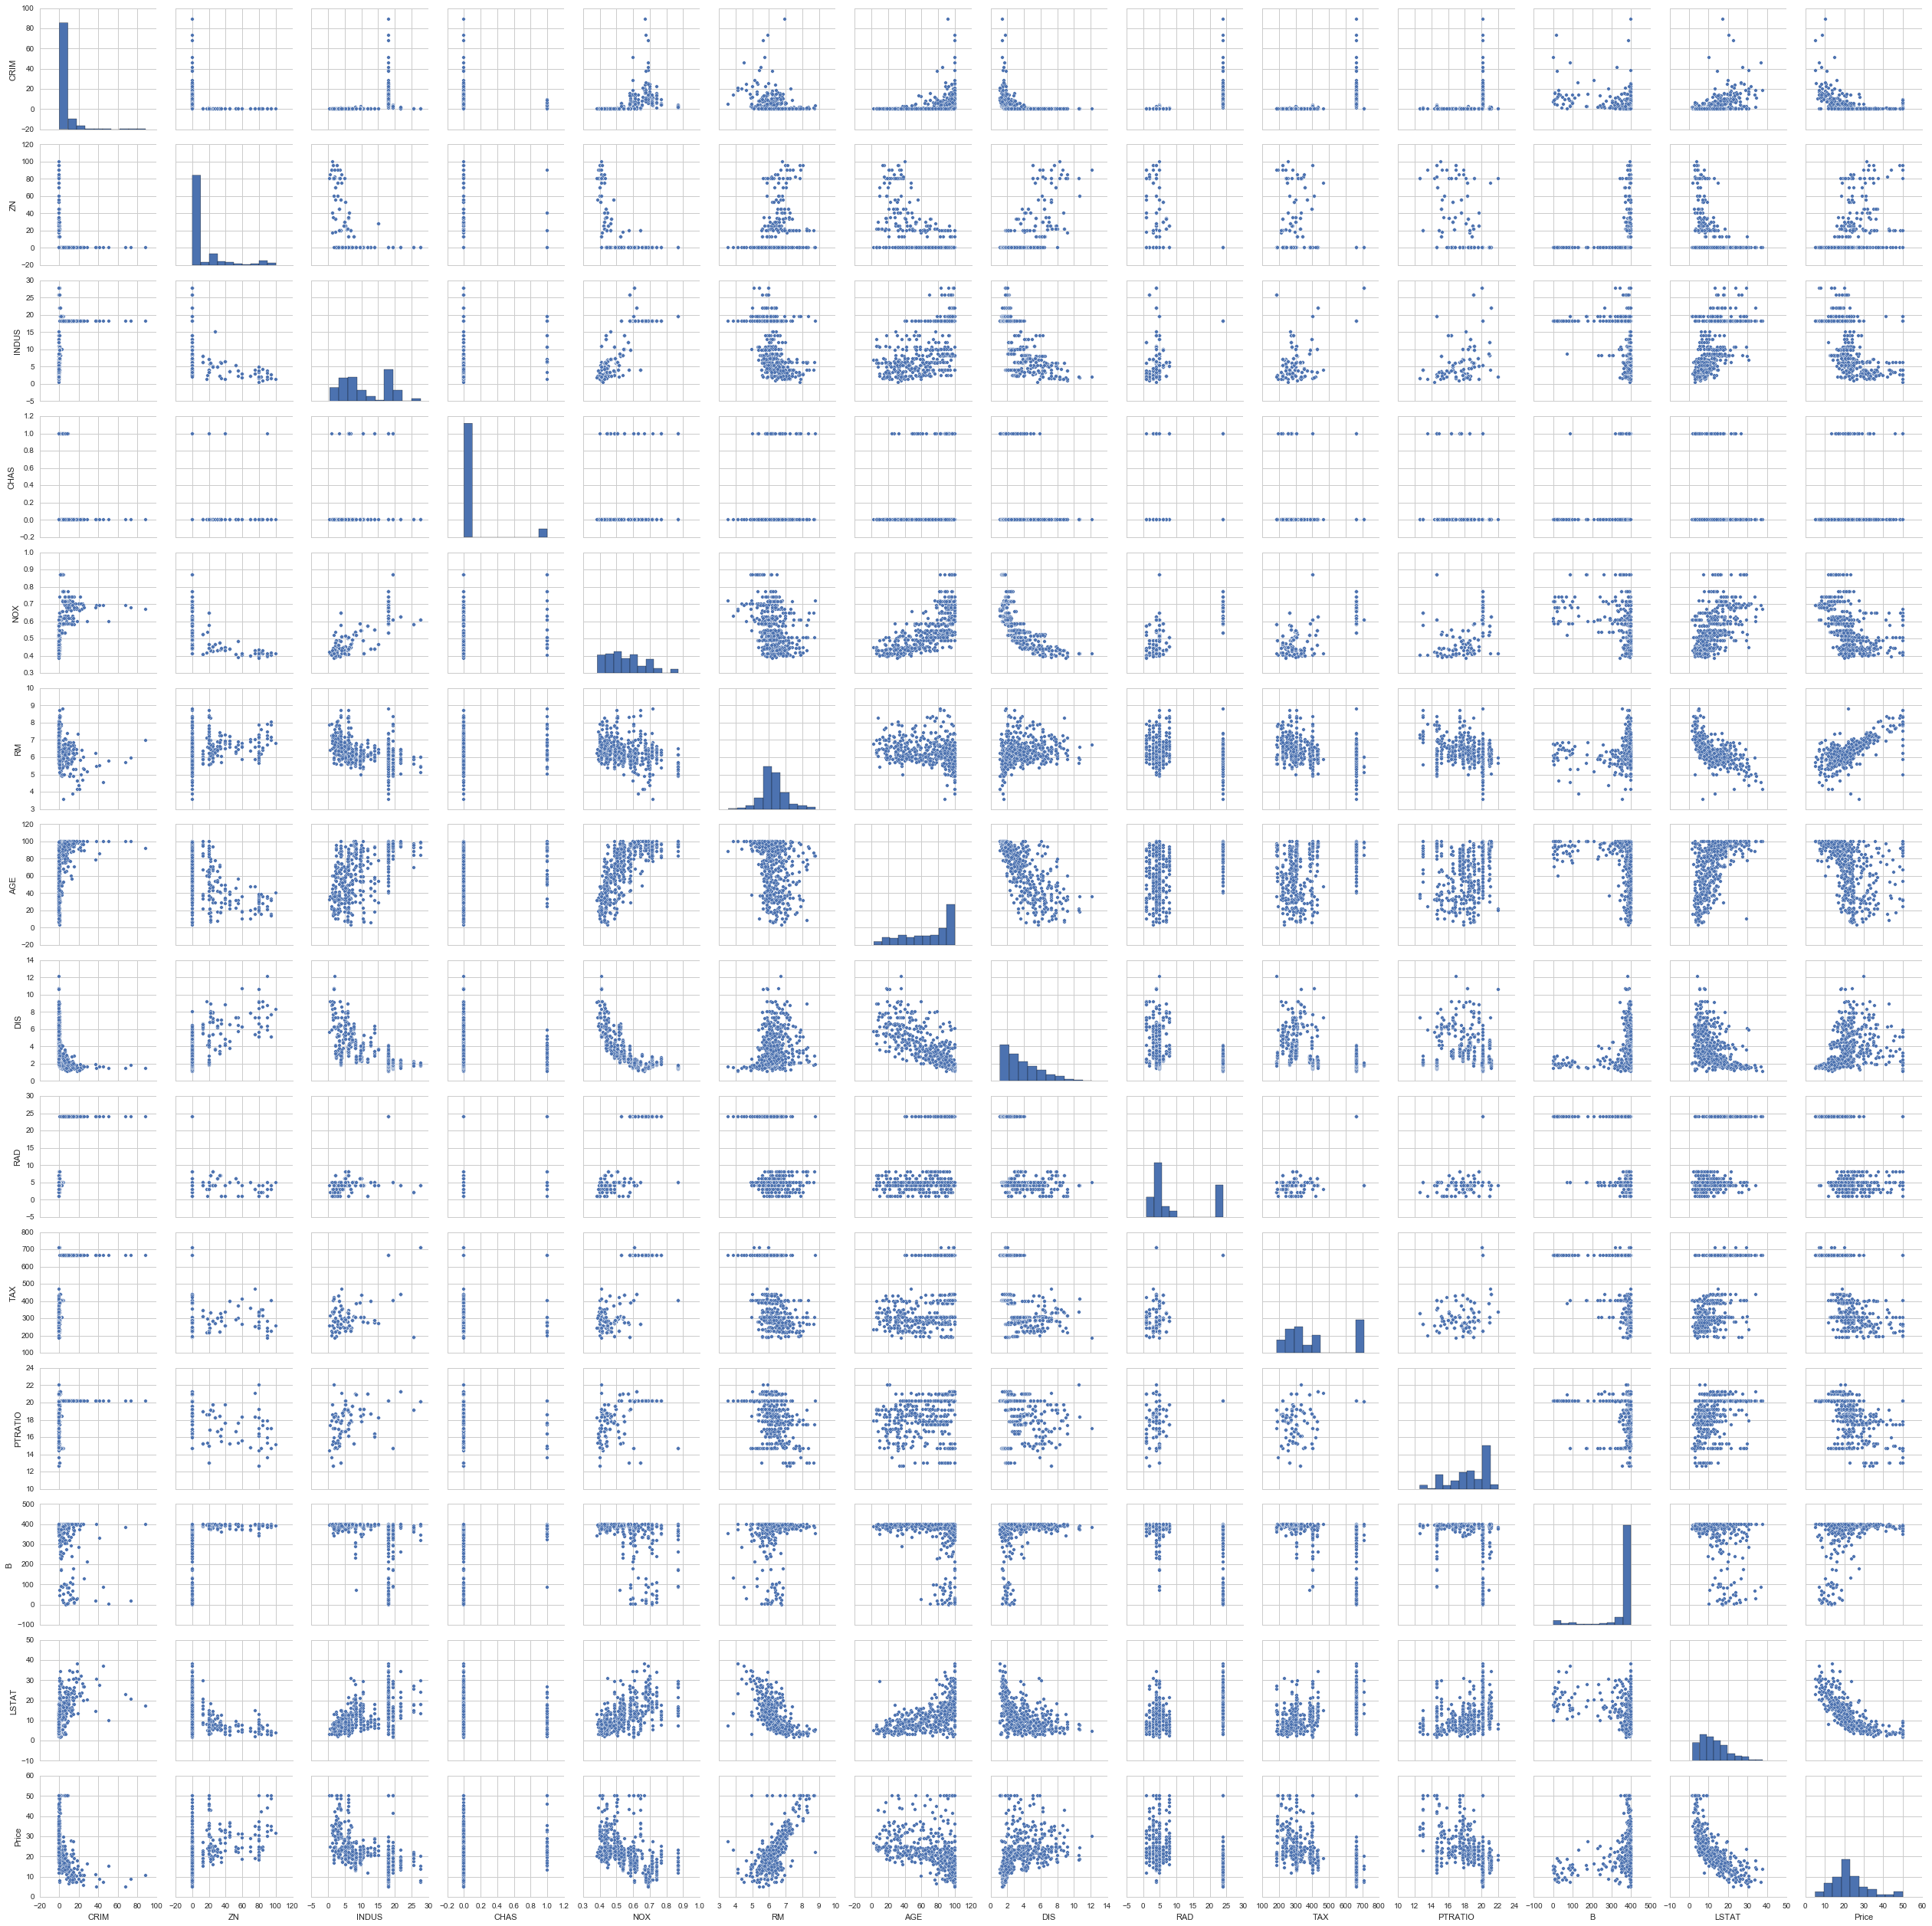

In [27]:
#TODO: we could plot the linear regrsion line vs real values
#plot 1, using panda tools , scatter_matrix
axes = pd.tools.plotting.scatter_matrix(boston_df, alpha=0.2)
#plot 2, using seaborn
sns.pairplot(boston_df)

In [28]:
#Let's predict the Price (target/ Y) using the variables trained in the model
sm_fit_statsmodel_predicted = sm_fit.predict(X_multi)

#Finally let's comprare some values predicted to the real values
predicted_df = DataFrame(Series(sm_fit_statsmodel_predicted[0:15]))
predicted_df.columns=['predicted']
predicted_df['y']=Y_target
predicted_df['err']=np.abs(predicted_df['predicted']-predicted_df['y'])
predicted_df

,predicted,y,err
0,30.008213,24.0,6.008213
1,25.029861,21.6,3.429861
2,30.570232,34.7,4.129768
3,28.608141,33.4,4.791859
4,27.942882,36.2,8.257118
5,25.259400,28.7,3.440600
6,23.004340,22.9,0.104340
7,19.534756,27.1,7.565244
8,11.516965,16.5,4.983035
9,18.919815,18.9,0.019815


### Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [29]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.

In [30]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)





We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [31]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

#check size of data and target 
print 'A) Number of (observations, columns) for the model variables: '
print  X_multi.shape

print 'B) Number of (observations, columns) for the model target: '
print  Y_target.shape


A) Number of (observations, columns) for the model variables: 
(506, 13)
B) Number of (observations, columns) for the model target: 
(506,)


Finally, we're ready to pass the X and Y using the linear regression object.

In [32]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

#Some tests; let's print some values predicted against real values
#Using panda series to convert array to DF column
predicted_df = DataFrame(Series(lreg.predict(X_multi)[0:15]))
predicted_df.columns=['predicted']
predicted_df['y']=Y_target
predicted_df['err']=np.abs(predicted_df['predicted']-predicted_df['y'])
predicted_df




,predicted,y,err
0,30.008213,24.0,6.008213
1,25.029861,21.6,3.429861
2,30.570232,34.7,4.129768
3,28.608141,33.4,4.791859
4,27.942882,36.2,8.257118
5,25.259400,28.7,3.440600
6,23.004340,22.9,0.104340
7,19.534756,27.1,7.565244
8,11.516965,16.5,4.983035
9,18.919815,18.9,0.019815


In [33]:
print ' The estimated intercept coefficient is %.2f ' %lreg.intercept_

 The estimated intercept coefficient is 36.49 


In [34]:
print ' The number of coefficients used was %d ' % len(lreg.coef_)

 The number of coefficients used was 13 


Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [35]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


#### How do we interpret the RM coefficient  (3.804752) ?

For a given of the rest of features, a "unit" increase in ROOM NUMBER is associated with a 3.804752 "unit" increase in Price.

Or more clearly: For a given amount of the rest of features, an additional ROOM in a house  is associated with an increase in price of 3.804752 (in 1000$ units) 

Therefore, a house will be  around 3804$ more expensive will be a house with an extra room.



Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

Now let's move on to Predicting prices!

### Step 7: Using Training and Validation 

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is *randomly*.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. You can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

By default, "sklearn.cross_validation.train_test_split" method chooses a test percentage of 0.25:    

25% for test and 75% for training.

### Feature selection:
 
 
 #### How do I decide which features to include in a linear model? 
 
 Here's one idea:
 
- Try different models, and only keep features in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new features.

What are the drawbacks to this approach?

- Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:
 
 
 #### R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

So is there a better approach to feature selection? Train/test split or cross-validation
 
 Train/test split or cross-validation. They provide a more reliable estimate of out-of-sample error, and thus are better for choosing which of your models will best generalize to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.


In [36]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_multi,Y_target,test_size=0.25,random_state=6)



Let's go ahead and see what the output of the train_test_split was:

In [37]:
# Print shapes of the training and testing data sets
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 13) (127, 13) (379,) (127,)


Great! Now that we have our training and testing sets we can continue on to predicint gprices based on the multiple variables.

### Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

Let's do a first model analysis using all features available:

R SQUARE OF MODEL-0: 0.748854
RMSE of the model: 5.065924

 Comparing samples. [y_pred size: (127,), y_target size: (127,)]
* predicted price for random observation: 20.981101 - Real Price: 23.100000 . Diference: 2.118899
* predicted price for random observation: 20.489125 - Real Price: 16.800000 . Diference: 3.689125
* predicted price for random observation: 21.291234 - Real Price: 21.700000 . Diference: 0.408766
* predicted price for random observation: 16.584272 - Real Price: 10.200000 . Diference: 6.384272
* predicted price for random observation: 24.226344 - Real Price: 19.100000 . Diference: 5.126344

 COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:
-------------------------------------------------------
  model_nr sample_nr     y       pred     error
0        0         0  23.1  20.981101  2.118899
0        0         1  16.8  20.489125  3.689125
0        0         2  21.7  21.291234  0.408766
0        0         3  10.2  16.584272  6.384272
0        0         4  19.1  24.226

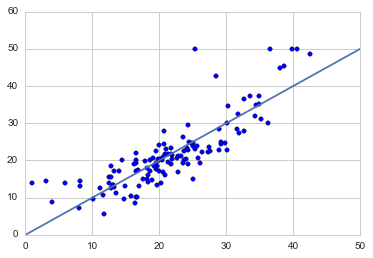

In [69]:
# Create our regression object
lreg0 = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
feature_selected = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

# use the list to select a subset of the original DataFrame
X = X_multi[feature_selected]
# select a Series from the DataFrame
y = Y_target

# split into training and testing sets
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X,y,test_size=0.25,random_state=6)

# fit the model to the training data (learn the coefficients)
lreg0.fit(X_train,y_train)

# make predictions on the testing set
y_pred = lreg0.predict(X_test)

#R SQUARE
print 'R SQUARE OF MODEL-0: %f' % lreg0.score(X_train,y_train)

# compute the RMSE of our predictions
from sklearn import metrics
print 'RMSE of the model: %f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#plot the predicted values agains the real values in the test sample
plt.scatter(y_pred,y_test)
plt.xlim(0, 50)
plt.ylim(0, 60)

#Draw a diagonal line. Values closer to this line has less errors, the opposite for values further away 
plt.plot([0, 20, 50], [0, 20,50])


#LET'S OBTAIN SOME SAMPLES OF REAL TARGET VALUES VS PREDICTED

df_samle_predictions= DataFrame(columns=['model_nr','sample_nr','y','pred','error'])

#for testing pourpuses
#cnt = 0
#for el in y_test:
#    print '-- Element %d in y_test: %f' % (cnt,el)
#    cnt+=1
    
#print ' ...... Element 100: %f' % list(y_test)[100]

# NOTE IMP!!!:  the result of the "train_test_split" function returned the test and train as a "set", 
# so we cannot access to the element by index. If we want to access by index it is convinient to
# transform it as a list:
y_test_list= list(y_test)

#compare the predicted PRICE for a random observation with the real PRICE
print '\n Comparing samples. [y_pred size: %s, y_target size: %s]' % (y_pred.shape, y_test.shape)
print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[100], y_test_list[100],np.abs(y_test_list[100]-y_pred[100]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['0','0',y_test_list[100],y_pred[100],np.abs(y_test_list[100]-y_pred[100])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[80], y_test_list[80],np.abs(y_test_list[80]-y_pred[80]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['0','1',y_test_list[80],y_pred[80],np.abs(y_test_list[80]-y_pred[80])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[50], y_test_list[50],np.abs(y_test_list[50]-y_pred[50]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['0','2',y_test_list[50],y_pred[50],np.abs(y_test_list[50]-y_pred[50])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[51], y_test_list[51],np.abs(y_test_list[51]-y_pred[51]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['0','3',y_test_list[51],y_pred[51],np.abs(y_test_list[51]-y_pred[51])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[52], y_test_list[52],np.abs(y_test_list[52]-y_pred[52]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['0','4',y_test_list[52],y_pred[52],np.abs(y_test_list[52]-y_pred[52])]],columns=['model_nr','sample_nr','y','pred','error']))

print "\n COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:"
print '-------------------------------------------------------'

print df_samle_predictions
#investigate how to generate a plot: x_axis: model 0, model1, model2, model3.., Y: error. For each model in x (5 columns , one for each test) 


Rememeber that we obtained an RMSE using all variables in the model. Let's test now if any variable should be removed. To do this the RMSE should decrease when we remove a target variable, this will indicate that the variables needs to be removed from the model ( minimize the error).

FEATURE SELECTION TEST: Let's evaluate how signinficant are the features,in this case we remove "RM" , the room number feature, which we know that is the most relevant for the model. 

As a result we see that the RMSE error increases, this points out that is not good idea to remove RM from the model since the error has increased. Remember that we try to minimize the error.

In [70]:
# Create our regression object
lreg1 = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
feature_selected = ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

# use the list to select a subset of the original DataFrame
X = X_multi[feature_selected]
# select a Series from the DataFrame
y = Y_target

# split into training and testing sets
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X,y,test_size=0.25,random_state=6)

# fit the model to the training data (learn the coefficients)
lreg1.fit(X_train,y_train)

# make predictions on the testing set
y_pred = lreg1.predict(X_test)

#R SQUARE
print 'R SQUARE OF MODEL-1: %f' % lreg1.score(X_train,y_train)

# compute the RMSE of our predictions
from sklearn import metrics
print 'RMSE of the model: %f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# NOTE IMP!!!:  the result of the "train_test_split" function returned the test and train as a "set", 
# so we cannot access to the element by index. If we want to access by index it is convinient to
# transform it as a list:
y_test_list= list(y_test)

#compare the predicted PRICE for a random observation with the real PRICE
print '\n Comparing samples. [y_pred size: %s, y_target size: %s]' % (y_pred.shape, y_test.shape)
print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[100], y_test_list[100],np.abs(y_test_list[100]-y_pred[100]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['1','0',y_test_list[100],y_pred[100],np.abs(y_test_list[100]-y_pred[100])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[80], y_test_list[80],np.abs(y_test_list[80]-y_pred[80]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['1','1',y_test_list[80],y_pred[80],np.abs(y_test_list[80]-y_pred[80])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[50], y_test_list[50],np.abs(y_test_list[50]-y_pred[50]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['1','2',y_test_list[50],y_pred[50],np.abs(y_test_list[50]-y_pred[50])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[51], y_test_list[51],np.abs(y_test_list[51]-y_pred[51]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['1','3',y_test_list[51],y_pred[51],np.abs(y_test_list[51]-y_pred[51])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[52], y_test_list[52],np.abs(y_test_list[52]-y_pred[52]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['1','4',y_test_list[52],y_pred[52],np.abs(y_test_list[52]-y_pred[52])]],columns=['model_nr','sample_nr','y','pred','error']))

print "\n COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:"
print '-------------------------------------------------------'

print df_samle_predictions

R SQUARE OF MODEL-1: 0.717667
RMSE of the model: 5.708481

 Comparing samples. [y_pred size: (127,), y_target size: (127,)]
* predicted price for random observation: 21.545639 - Real Price: 23.100000 . Diference: 1.554361
* predicted price for random observation: 21.816098 - Real Price: 16.800000 . Diference: 5.016098
* predicted price for random observation: 21.232717 - Real Price: 21.700000 . Diference: 0.467283
* predicted price for random observation: 18.079119 - Real Price: 10.200000 . Diference: 7.879119
* predicted price for random observation: 25.917295 - Real Price: 19.100000 . Diference: 6.817295

 COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:
-------------------------------------------------------
  model_nr sample_nr     y       pred     error
0        0         0  23.1  20.981101  2.118899
0        0         1  16.8  20.489125  3.689125
0        0         2  21.7  21.291234  0.408766
0        0         3  10.2  16.584272  6.384272
0        0         4  19.1  24.226

HERE we have an example of a feature that has to be removed!

When removing "TAX" the RMSE decreases from 5.21 to 5.15

In [71]:
# Create our regression object
lreg2 = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
feature_selected = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO','B','LSTAT']

# use the list to select a subset of the original DataFrame
X = X_multi[feature_selected]
# select a Series from the DataFrame
y = Y_target

# split into training and testing sets
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X,y,test_size=0.25,random_state=6)

# fit the model to the training data (learn the coefficients)
lreg2.fit(X_train,y_train)

# make predictions on the testing set
y_pred = lreg2.predict(X_test)

#R SQUARE
print 'R SQUARE OF MODEL-2: %f' % lreg2.score(X_train,y_train)

# compute the RMSE of our predictions
from sklearn import metrics
print 'RMSE of the model: %f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# NOTE IMP!!!:  the result of the "train_test_split" function returned the test and train as a "set", 
# so we cannot access to the element by index. If we want to access by index it is convinient to
# transform it as a list:
y_test_list= list(y_test)

#compare the predicted PRICE for a random observation with the real PRICE
print '\n Comparing samples. [y_pred size: %s, y_target size: %s]' % (y_pred.shape, y_test.shape)
print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[100], y_test_list[100],np.abs(y_test_list[100]-y_pred[100]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['2','0',y_test_list[100],y_pred[100],np.abs(y_test_list[100]-y_pred[100])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[80], y_test_list[80],np.abs(y_test_list[80]-y_pred[80]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['2','1',y_test_list[80],y_pred[80],np.abs(y_test_list[80]-y_pred[80])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[50], y_test_list[50],np.abs(y_test_list[50]-y_pred[50]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['2','2',y_test_list[50],y_pred[50],np.abs(y_test_list[50]-y_pred[50])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[51], y_test_list[51],np.abs(y_test_list[51]-y_pred[51]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['2','3',y_test_list[51],y_pred[51],np.abs(y_test_list[51]-y_pred[51])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[52], y_test_list[52],np.abs(y_test_list[52]-y_pred[52]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['2','4',y_test_list[52],y_pred[52],np.abs(y_test_list[52]-y_pred[52])]],columns=['model_nr','sample_nr','y','pred','error']))

print "\n COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:"
print '-------------------------------------------------------'

print df_samle_predictions

R SQUARE OF MODEL-2: 0.739776
RMSE of the model: 5.009985

 Comparing samples. [y_pred size: (127,), y_target size: (127,)]
* predicted price for random observation: 20.923858 - Real Price: 23.100000 . Diference: 2.176142
* predicted price for random observation: 20.737785 - Real Price: 16.800000 . Diference: 3.937785
* predicted price for random observation: 21.202526 - Real Price: 21.700000 . Diference: 0.497474
* predicted price for random observation: 16.556110 - Real Price: 10.200000 . Diference: 6.356110
* predicted price for random observation: 24.403198 - Real Price: 19.100000 . Diference: 5.303198

 COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:
-------------------------------------------------------
  model_nr sample_nr     y       pred     error
0        0         0  23.1  20.981101  2.118899
0        0         1  16.8  20.489125  3.689125
0        0         2  21.7  21.291234  0.408766
0        0         3  10.2  16.584272  6.384272
0        0         4  19.1  24.226

Finally we have deleted the features "AGE" and "INDUS" due that the RMSE decreased when removing each of these variables from the model, so we can conclude that they were not relevant for the model making good predictions.

R SQUARE OF MODEL-3: 0.737006
RMSE of the model: 4.949023

 Comparing samples. [y_pred size: (127,), y_target size: (127,)]
* predicted price for random observation: 20.618846 - Real Price: 23.100000 . Diference: 2.481154
* predicted price for random observation: 20.311964 - Real Price: 16.800000 . Diference: 3.511964
* predicted price for random observation: 21.698807 - Real Price: 21.700000 . Diference: 0.001193
* predicted price for random observation: 16.703043 - Real Price: 10.200000 . Diference: 6.503043
* predicted price for random observation: 25.397791 - Real Price: 19.100000 . Diference: 6.297791

 COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:
-------------------------------------------------------
  model_nr sample_nr     y       pred     error
0        0         0  23.1  20.981101  2.118899
0        0         1  16.8  20.489125  3.689125
0        0         2  21.7  21.291234  0.408766
0        0         3  10.2  16.584272  6.384272
0        0         4  19.1  24.226

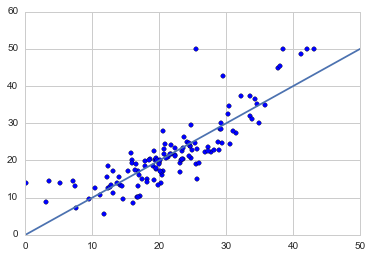

In [72]:
# REMOVED: AGE, INDUS
#Create our regression object
lreg3 = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
feature_selected = ['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','PTRATIO','B','LSTAT']

# use the list to select a subset of the original DataFrame
X = X_multi[feature_selected]
# select a Series from the DataFrame
y = Y_target

# split into training and testing sets
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X,y,test_size=0.25,random_state=6)

# fit the model to the training data (learn the coefficients)
lreg3.fit(X_train,y_train)

# make predictions on the testing set
y_pred = lreg3.predict(X_test)

# make predictions on the training set
y_pred_train = lreg3.predict(X_train)

#R SQUARE
print 'R SQUARE OF MODEL-3: %f' % lreg3.score(X_train,y_train)

# compute the RMSE of our predictions
from sklearn import metrics
print 'RMSE of the model: %f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#plot the predicted values agains the real values in the test sample
plt.scatter(y_pred,y_test)
plt.xlim(0, 50)
plt.ylim(0, 60)


#Draw a diagonal line. Values closer to this line has less errors, the opposite for values further away 
plt.plot([0, 20, 50], [0, 20,50])

# NOTE IMP!!!:  the result of the "train_test_split" function returned the test and train as a "set", 
# so we cannot access to the element by index. If we want to access by index it is convinient to
# transform it as a list:
y_test_list= list(y_test)

#compare the predicted PRICE for a random observation with the real PRICE
print '\n Comparing samples. [y_pred size: %s, y_target size: %s]' % (y_pred.shape, y_test.shape)
print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[100], y_test_list[100],np.abs(y_test_list[100]-y_pred[100]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['3','0',y_test_list[100],y_pred[100],np.abs(y_test_list[100]-y_pred[100])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[80], y_test_list[80],np.abs(y_test_list[80]-y_pred[80]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['3','1',y_test_list[80],y_pred[80],np.abs(y_test_list[80]-y_pred[80])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[50], y_test_list[50],np.abs(y_test_list[50]-y_pred[50]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['3','2',y_test_list[50],y_pred[50],np.abs(y_test_list[50]-y_pred[50])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[51], y_test_list[51],np.abs(y_test_list[51]-y_pred[51]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['3','3',y_test_list[51],y_pred[51],np.abs(y_test_list[51]-y_pred[51])]],columns=['model_nr','sample_nr','y','pred','error']))

print '* predicted price for random observation: %f - Real Price: %f . Diference: %f'% (y_pred[52], y_test_list[52],np.abs(y_test_list[52]-y_pred[52]))
df_samle_predictions = df_samle_predictions.append(DataFrame([['3','4',y_test_list[52],y_pred[52],np.abs(y_test_list[52]-y_pred[52])]],columns=['model_nr','sample_nr','y','pred','error']))

print "\n COMPARING SAMPLE PREDICTION AND TARGET IN EACH MODEL:"
print '-------------------------------------------------------'

print df_samle_predictions



So, Finally we choose Model 3 as our final model:

In [73]:
#lreg.intercept_ 
df_coef = DataFrame( lreg3.coef_,columns=["coef"])
df_coef['features'] = feature_selected

print 'FINAL MODEL: \nList of coeficients for each feature, defining the SLOPE:' 
print df_coef
print "\nThe INTERCEPT for the model is: %f" % lreg3.intercept_

FINAL MODEL: 
List of coeficients for each feature, defining the SLOPE:
        coef features
0  -0.071067     CRIM
1   0.042169       ZN
2   2.791952     CHAS
3 -18.333726      NOX
4   3.591137       RM
5  -1.511915      DIS
6   0.111111      RAD
7  -1.048709  PTRATIO
8   0.009168        B
9  -0.597914    LSTAT

The INTERCEPT for the model is: 38.011589


Now that we have generated 4 models and taken samples of predicted vs target value, let's compare them:

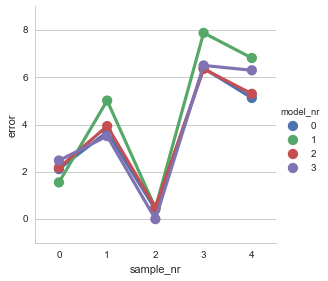

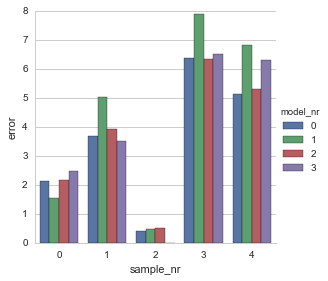

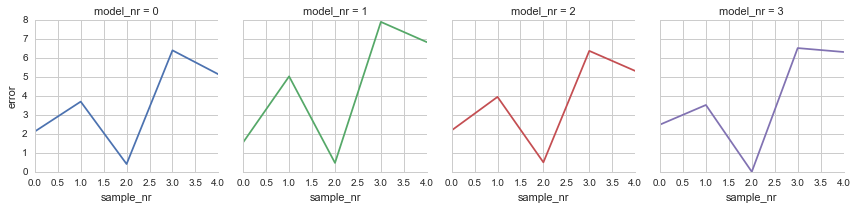

In [76]:
sns.factorplot(x='sample_nr',y='error',data=df_samle_predictions,hue='model_nr',kind='point')
sns.factorplot(x='sample_nr',y='error',data=df_samle_predictions,hue='model_nr',kind='bar')

g = sns.FacetGrid(df_samle_predictions, col='model_nr', hue='model_nr')
g.map(plt.plot, 'sample_nr', 'error')
#plt.show()

At this point we have obtained a linear model minimizing the errors. We can conclude to have a reasonable good model.

Now run a prediction on both the X training set and the testing set.

In [369]:
#Some tests; let's print some values predicted against real values
#Using panda series to convert array to DF column
#predicted_df =DataFrame(columns=['pred','y'])
#predicted_df['y']=Series(y_test)
#predicted_df['pred']=Series(y_pred)
#predicted_df


Now we will get the mean square error

In [77]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((y_train - y_pred_train) ** 2)
    
print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((y_test - y_pred) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 21.98
Fit a model X_train, and calculate MSE with X_test and Y_test: 24.49


It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

### Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

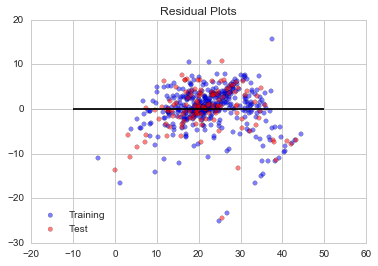

In [78]:
# Scatter plot the training data
train = plt.scatter(y_pred_train,(y_pred_train-y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(y_pred,(y_pred-y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Great! Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal.

Documentation:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model